# Data Organizer

This Jupyter Notebook will serve the purpose of removing all the data files that we don't want



In [2]:
import os
import pandas as pd

## Commented Code

The commented code has already been run and is commented out to prevent errors since file structures have changed

In [2]:
'''
#Change directory to the data directory
os.chdir("/Users/adish/Documents/School/Fall 2021 Courses/Deep Learning - Signals/Final Project/EMGGestureClassification/Data/Data-HDF5")

#now we can print out all of the data files that end in .hdf5
for filename in os.listdir():
    if filename.endswith(".hdf5"):
        print(filename)
'''

'\n#Change directory to the data directory\nos.chdir("/Users/adish/Documents/School/Fall 2021 Courses/Deep Learning - Signals/Final Project/EMGGestureClassification/Data/Data-HDF5")\n\n#now we can print out all of the data files that end in .hdf5\nfor filename in os.listdir():\n    if filename.endswith(".hdf5"):\n        print(filename)\n'

In [3]:
'''
for filename in os.listdir():
    if filename.endswith(".hdf5") and 'sequential' in filename:
        print(filename)
'''

'\nfor filename in os.listdir():\n    if filename.endswith(".hdf5") and \'sequential\' in filename:\n        print(filename)\n'

In [4]:
'''
os.mkdir("sequential")
os.mkdir("repeats-long")
os.mkdir("repeats-short")
'''

'\nos.mkdir("sequential")\nos.mkdir("repeats-long")\nos.mkdir("repeats-short")\n'

In [3]:
base = "/Users/adish/Documents/School/Fall 2021 Courses/Deep Learning - Signals/Final Project/EMGGestureClassification/Data/Data-HDF5"

seq = os.path.join(base,"sequential")
repLong = os.path.join(base,"repeats-long")
repShort = os.path.join(base,"repeats-short")

In [6]:
'''
# import shutil
#Now we can move the files above to another location so we can process it
for filename in os.listdir():
    if filename.endswith(".hdf5") and 'sequential' in filename:
        print("Moving {}".format(filename))
        shutil.move(os.path.join(base,filename),seq)
    if filename.endswith(".hdf5") and 'repeats_long' in filename:
        print("Moving {}".format(filename))
        shutil.move(os.path.join(base,filename),repLong)
    if filename.endswith(".hdf5") and 'repeats_short' in filename:
        print("Moving {}".format(filename))
        shutil.move(os.path.join(base,filename),repShort)
'''

'\n# import shutil\n#Now we can move the files above to another location so we can process it\nfor filename in os.listdir():\n    if filename.endswith(".hdf5") and \'sequential\' in filename:\n        print("Moving {}".format(filename))\n        shutil.move(os.path.join(base,filename),seq)\n    if filename.endswith(".hdf5") and \'repeats_long\' in filename:\n        print("Moving {}".format(filename))\n        shutil.move(os.path.join(base,filename),repLong)\n    if filename.endswith(".hdf5") and \'repeats_short\' in filename:\n        print("Moving {}".format(filename))\n        shutil.move(os.path.join(base,filename),repShort)\n'

In [11]:
os.chdir(seq)
filename = os.listdir()[0]
data = pd.read_hdf(filename)
data = data.iloc[:,1:25]
data.head()

,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,EMG_11,...,EMG_16,EMG_17,EMG_18,EMG_19,EMG_20,EMG_21,EMG_22,EMG_23,EMG_24,TRAJ_1
-0.058426,-3.0,-3.0,-1.0,-4.0,-5.0,-6.0,-5.0,-3.0,-4.0,-3.0,...,-2.0,-3.0,-3.0,-3.0,-3.0,-2.0,-3.0,-3.0,-3.0,-1.0
-0.058230,3.0,3.0,3.0,1.0,-2.0,-2.0,0.0,1.0,2.0,3.0,...,4.0,-3.0,0.0,-1.0,-1.0,0.0,0.0,-2.0,-1.0,-1.0
-0.058035,18.0,17.0,16.0,15.0,6.0,8.0,12.0,12.0,16.0,14.0,...,17.0,0.0,8.0,5.0,3.0,6.0,3.0,4.0,5.0,-1.0
-0.057840,30.0,31.0,27.0,26.0,16.0,17.0,22.0,22.0,27.0,23.0,...,28.0,0.0,15.0,10.0,8.0,13.0,6.0,9.0,11.0,-1.0
-0.057645,34.0,35.0,31.0,30.0,21.0,19.0,26.0,25.0,30.0,27.0,...,32.0,0.0,17.0,13.0,9.0,14.0,8.0,10.0,13.0,-1.0


In [8]:
#import our module
from DataExtractor import hdfSlidingData

window = 1347583 #Set a default window size
slider = hdfSlidingData(window)
#define file paths
base = "/Users/adish/Documents/School/Fall 2021 Courses/Deep Learning - Signals/Final Project/EMGGestureClassification/Data/Data-HDF5"

seq = os.path.join(base,"sequential")
repLong = os.path.join(base,"repeats-long")
repShort = os.path.join(base,"repeats-short")

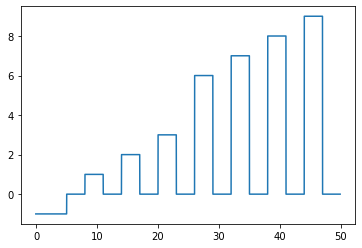

In [14]:
import matplotlib.pyplot as plt
#try running our class on one file
os.chdir(seq)
filename = os.listdir()[0]

data = pd.read_hdf(filename)
sliceEnd = 256_000
plt.plot(data.index[:sliceEnd],data.iloc[:sliceEnd,24])


In [35]:
df = data.iloc[7311:8311,0:25]

cols = df.columns

In [37]:
from statistics import mode
mode(df[cols[-1]].values.tolist()[:10])

-1.0